In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_df = pd.read_csv('data_cred_train.csv')

In [3]:
train_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
#Loan_ID                      - ID Кредита
#Customer ID                  - ID Пользователя
#Loan Status                  - статус займа
#Current Loan Amount          - текущая сумма кредита
#Term                         - срок выплаты
#Credit Score                 - кредитный рейтинг
#Annual Income                - годовой доход
#Years in current job         - сколько лет на текущей работе
#Home Ownership               - статус владения жилищем
#Purpose                      - цель взятия кредита
#Monthly Debt                 - ежемесячный долг
#Years of credit history      - годы кредитной истории
#Months since last delinquent - количество месяцев с момента последнего просрочки платежа
#Number of Open accounts      - количество открытых счетов
#Number of Credit problems    - количество кредитных проблем
#Current Credit Balance       - текущий кредитный баланс
    #The current balance (also called the credit card balance) 
    #reflects the current amount of all charges and payments made to your account up to that day
#Maximum open credit          - максимальные открытые кредиты
#Bankruptcies                 - банкротства
#Tax liens                    - налоговые строки

In [5]:
#Определим вес параметров на кредитный рейтинг:
#Loan_ID                      - не влияет
#Customer ID                  - не влияет
#Ссуды и займы - необходимы для принятия решения о надежности и платежеспособности клиента
#Вес: 
#Loan Status                  - статус займа
#Current Loan Amount          - текущая сумма кредита
#Term                         - срок выплаты
#Credit Score                 - кредитный рейтинг
#Annual Income                - годовой доход
#Years in current job         - сколько лет на текущей работе
#Home Ownership               - статус владения жилищем
#Purpose                      - цель взятия кредита
#Monthly Debt                 - ежемесячный долг
#Years of credit history      - годы кредитной истории
#Months since last delinquent - количество месяцев с момента последнего просрочки платежа
#Number of Open accounts      - количество открытых счетов
#Number of Credit problems    - количество кредитных проблем
#Current Credit Balance       - текущий кредитный баланс
#Maximum open credit          - максимальные открытые кредиты
#Bankruptcies                 - банкротства
#Tax liens   

In [6]:
train_df.shape

(100514, 19)

In [7]:
train_df.describe().round(3)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000,8.084600e+04,100000.000,100000.000,46859.000,100000.000,100000.000,1.000000e+05,9.999800e+04,99796.000,99990.000
mean,1.176045e+07,1076.456,1.378277e+06,18472.412,18.199,34.901,11.129,0.168,2.946374e+05,7.607984e+05,0.118,0.029
std,3.178394e+07,1475.404,1.081360e+06,12174.993,7.015,21.998,5.010,0.483,3.761709e+05,8.384503e+06,0.351,0.258
min,1.080200e+04,585.000,7.662700e+04,0.000,3.600,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000,0.000
25%,1.796520e+05,705.000,8.488440e+05,10214.162,13.500,16.000,8.000,0.000,1.126700e+05,2.734380e+05,0.000,0.000
50%,3.122460e+05,724.000,1.174162e+06,16220.300,16.900,32.000,10.000,0.000,2.098170e+05,4.678740e+05,0.000,0.000
75%,5.249420e+05,741.000,1.650663e+06,24012.058,21.700,51.000,14.000,0.000,3.679588e+05,7.829580e+05,0.000,0.000
max,1.000000e+08,7510.000,1.655574e+08,435843.280,70.500,176.000,76.000,15.000,3.287897e+07,1.539738e+09,7.000,15.000


In [8]:
#train_nums_df = train_df.select_dtypes(include='number')
#train_nums_df.head()
#(train_nums_df.groupby(train_nums_df.columns.str[-1], axis=1)).apply(lambda x: x.astype(str).apply('±'.join, 1))

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [10]:
train_df['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy', nan],
      dtype=object)

In [11]:
train_df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage', nan],
      dtype=object)

In [12]:
train_df['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [13]:
train_df['Years in current job'].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

<AxesSubplot:>

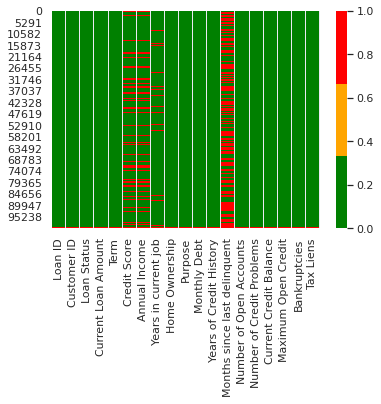

In [14]:
#Проверим число пустых строчек для каждой колонки
sns.heatmap(train_df.isnull(), cmap=sns.color_palette(['green', 'orange', 'red']))

In [15]:
#Можем сделать вывод, что больше всего неизвестно данных о
# числе месяцев спустя крайней неуплаты
# годовом доходе и кредитном рейтинге
# сроку службы на текущей работе

In [16]:
for i in train_df.columns:
    prc = np.mean(train_df[i].isnull())
    print(i, '- %.2f'%(prc * 100), 'perc', sep=' ')

Loan ID - 0.51 perc
Customer ID - 0.51 perc
Loan Status - 0.51 perc
Current Loan Amount - 0.51 perc
Term - 0.51 perc
Credit Score - 19.57 perc
Annual Income - 19.57 perc
Years in current job - 4.71 perc
Home Ownership - 0.51 perc
Purpose - 0.51 perc
Monthly Debt - 0.51 perc
Years of Credit History - 0.51 perc
Months since last delinquent - 53.38 perc
Number of Open Accounts - 0.51 perc
Number of Credit Problems - 0.51 perc
Current Credit Balance - 0.51 perc
Maximum Open Credit - 0.51 perc
Bankruptcies - 0.71 perc
Tax Liens - 0.52 perc


In [17]:
#Принимаем решение об избавлении от стобца Months since last delinquent
train_df = train_df.drop(['Months since last delinquent'], axis='columns')

In [18]:
#Удалим строки, не содержащие никакую информацию
train_df = train_df.dropna(how='all')

In [19]:
train_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [20]:
train_df['Loan Status'] = train_df['Loan Status'].astype('string').str.lower()
train_df['Term'] = train_df['Term'].astype('string').str.lower()
train_df['Home Ownership'] = train_df['Home Ownership'].astype('string').str.lower()
train_df['Purpose'] = train_df['Purpose'].astype('string').str.lower()

In [21]:
train_df['Purpose'].unique()

<StringArray>
[   'home improvements',   'debt consolidation',            'buy house',
                'other',        'business loan',            'buy a car',
       'major_purchase',          'take a trip',       'small_business',
        'medical bills',              'wedding',             'vacation',
 'educational expenses',               'moving',     'renewable_energy']
Length: 15, dtype: string

In [22]:
train_df['Purpose'] = train_df['Purpose'].str.replace('_', ' ')
train_df['Purpose'].unique()

<StringArray>
[   'home improvements',   'debt consolidation',            'buy house',
                'other',        'business loan',            'buy a car',
       'major purchase',          'take a trip',       'small business',
        'medical bills',              'wedding',             'vacation',
 'educational expenses',               'moving',     'renewable energy']
Length: 15, dtype: string

In [23]:
train_df.loc[train_df['Years in current job'] == '< 1 year', 'Years in current job'] = 0
train_df.loc[train_df['Years in current job'] == '1 year', 'Years in current job'] = 1
train_df.loc[train_df['Years in current job'] == '2 years', 'Years in current job'] = 2
train_df.loc[train_df['Years in current job'] == '3 years', 'Years in current job'] = 3
train_df.loc[train_df['Years in current job'] == '4 years', 'Years in current job'] = 4
train_df.loc[train_df['Years in current job'] == '5 years', 'Years in current job'] = 5
train_df.loc[train_df['Years in current job'] == '6 years', 'Years in current job'] = 6
train_df.loc[train_df['Years in current job'] == '7 years', 'Years in current job'] = 7
train_df.loc[train_df['Years in current job'] == '8 years', 'Years in current job'] = 8
train_df.loc[train_df['Years in current job'] == '9 years', 'Years in current job'] = 9
train_df.loc[train_df['Years in current job'] == '10+ years', 'Years in current job'] = 10
train_df['Years in current job'] = train_df['Years in current job'].astype(float)

In [24]:
train_df['Years in current job'].unique()

array([ 8., 10.,  3.,  5.,  0.,  2.,  4.,  9.,  7.,  1., nan,  6.])

In [25]:
#Обнаружим выбросы
for i in train_df.select_dtypes(include='number').columns:
    print(i,'-', train_df[i].quantile(0.75), '-', train_df[i].max(), end='\n', sep=' ')

Current Loan Amount - 524942.0 - 99999999.0
Credit Score - 741.0 - 7510.0
Annual Income - 1650663.0 - 165557393.0
Years in current job - 10.0 - 10.0
Monthly Debt - 24012.0575 - 435843.28
Years of Credit History - 21.7 - 70.5
Number of Open Accounts - 14.0 - 76.0
Number of Credit Problems - 0.0 - 15.0
Current Credit Balance - 367958.75 - 32878968.0
Maximum Open Credit - 782958.0 - 1539737892.0
Bankruptcies - 0.0 - 7.0
Tax Liens - 0.0 - 15.0


In [26]:
#Заменим выбросы пустыми значениями
num_columns = ['Current Loan Amount', 'Credit Score', 'Annual Income', 
               'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit']
for col in num_columns:
    col_std = train_df[col].std()
    col_mean = train_df[col].median()
    train_df.loc[(train_df[col] - col_mean).abs() > (3 * col_std), col] = np.nan

In [27]:
#Заполним пустые значения медианными значениями
for col in train_df.select_dtypes(include='number'):
    train_df[col].fillna(train_df[col].median(), inplace=True)

In [28]:
#Проверим наличие пустых значений
train_df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [29]:
#Произведем замену значений столбцов на баллы кредитного скоринга

In [30]:
train_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,fully paid,445412.0,short term,709.0,1167493.0,8.0,home mortgage,home improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,fully paid,262328.0,short term,722.0,1165507.5,10.0,home mortgage,debt consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,fully paid,267344.0,short term,741.0,2231892.0,8.0,own home,debt consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,fully paid,347666.0,long term,721.0,806949.0,3.0,own home,debt consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,fully paid,176220.0,short term,722.0,1165507.5,5.0,rent,debt consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
